In [52]:
import pandas as pd
import numpy as np
import random as rd
import sklearn as skl
from scipy.stats import multivariate_normal
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Ejercicio 1

In [53]:
df = pd.read_csv('ejemplo_data.csv')

In [54]:
df

,ID,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
0,10002,Verde Mar,"$125,000.00",$162500.00,30.00%,500,1-10-2015,1
1,552278,Manantial sa,"$920,000.00","$101,2000.00",10.00%,700,6-23-2014,0
2,23477,ACME,"$50,000.00",62500.00,25.00%,125,3-12-2016,1
3,24900,Andes sur,"$350,000.00",490000.00,4.00%,75,10-28-2015,1
4,651029,San Pablo,"$15,000.00",$12750.00,-15.00%,No,2-15-2014,0
5,651029,San Pablo,"-$15,000.00",$ 12750.00,-15.00%,No,2-15-2014,n


In [55]:
df.dtypes

ID              int64
Nombre         object
2016           object
2017           object
Crecimiento    object
Unidades       object
fecha          object
Activo         object
dtype: object

In [56]:
df.info

<bound method DataFrame.info of        ID        Nombre         2016          2017 Crecimiento Unidades  \
0   10002     Verde Mar  $125,000.00    $162500.00      30.00%      500   
1  552278  Manantial sa  $920,000.00  $101,2000.00      10.00%      700   
2   23477          ACME   $50,000.00      62500.00      25.00%      125   
3   24900     Andes sur  $350,000.00     490000.00       4.00%       75   
4  651029     San Pablo   $15,000.00     $12750.00     -15.00%       No   
5  651029     San Pablo  -$15,000.00    $ 12750.00     -15.00%       No   

        fecha Activo  
0   1-10-2015      1  
1   6-23-2014      0  
2   3-12-2016      1  
3  10-28-2015      1  
4   2-15-2014      0  
5   2-15-2014      n  >

In [57]:
# El atributo ID ya es entero por lo cual queda la misma manera

In [58]:
df["Activo"]  = pd.to_numeric(df['Activo'], errors='coerce').fillna(1).astype('bool')

In [59]:
df

,ID,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
0,10002,Verde Mar,"$125,000.00",$162500.00,30.00%,500,1-10-2015,True
1,552278,Manantial sa,"$920,000.00","$101,2000.00",10.00%,700,6-23-2014,False
2,23477,ACME,"$50,000.00",62500.00,25.00%,125,3-12-2016,True
3,24900,Andes sur,"$350,000.00",490000.00,4.00%,75,10-28-2015,True
4,651029,San Pablo,"$15,000.00",$12750.00,-15.00%,No,2-15-2014,False
5,651029,San Pablo,"-$15,000.00",$ 12750.00,-15.00%,No,2-15-2014,True


In [60]:
df.dtypes

ID              int64
Nombre         object
2016           object
2017           object
Crecimiento    object
Unidades       object
fecha          object
Activo           bool
dtype: object

In [61]:
df["Unidades"]  = pd.to_numeric(df['Unidades'], errors='coerce').fillna(0).astype('int')

In [62]:
df


,ID,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
0,10002,Verde Mar,"$125,000.00",$162500.00,30.00%,500,1-10-2015,True
1,552278,Manantial sa,"$920,000.00","$101,2000.00",10.00%,700,6-23-2014,False
2,23477,ACME,"$50,000.00",62500.00,25.00%,125,3-12-2016,True
3,24900,Andes sur,"$350,000.00",490000.00,4.00%,75,10-28-2015,True
4,651029,San Pablo,"$15,000.00",$12750.00,-15.00%,0,2-15-2014,False
5,651029,San Pablo,"-$15,000.00",$ 12750.00,-15.00%,0,2-15-2014,True


In [63]:
def convertir_monto(val):
    nuevo_data = val.replace(',','').replace('$', '')
    return float(nuevo_data)

In [64]:
df['2016']  = df['2016'].apply(convertir_monto)

In [65]:
df

,ID,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
0,10002,Verde Mar,125000.0,$162500.00,30.00%,500,1-10-2015,True
1,552278,Manantial sa,920000.0,"$101,2000.00",10.00%,700,6-23-2014,False
2,23477,ACME,50000.0,62500.00,25.00%,125,3-12-2016,True
3,24900,Andes sur,350000.0,490000.00,4.00%,75,10-28-2015,True
4,651029,San Pablo,15000.0,$12750.00,-15.00%,0,2-15-2014,False
5,651029,San Pablo,-15000.0,$ 12750.00,-15.00%,0,2-15-2014,True


## Ejercicio 2

In [66]:
comuna = ['Juan', 'Diego', 'Sonny', 'Nelson', 'Maria', 'Camila']

def random_comuna(val):
    return val[rd.randint(0,len(val)-1)]

len(comuna)

6

In [67]:
nombres = []
edades = []
notas = []
for i in range (0,20):
    nombres.append(random_comuna(comuna))
    edades.append(rd.randint(18,50))
    notas.append(round(rd.uniform(2.5,7.0),1))

In [68]:
diccionario = list(zip(nombres,edades,notas))

diccionario

[('Diego', 45, 5.8),
 ('Juan', 33, 3.1),
 ('Juan', 46, 4.0),
 ('Nelson', 37, 6.7),
 ('Juan', 31, 6.9),
 ('Maria', 23, 3.5),
 ('Maria', 47, 2.9),
 ('Nelson', 48, 3.6),
 ('Sonny', 30, 2.9),
 ('Juan', 20, 2.8),
 ('Juan', 48, 4.4),
 ('Nelson', 50, 3.2),
 ('Juan', 20, 4.9),
 ('Sonny', 24, 3.6),
 ('Camila', 25, 4.1),
 ('Camila', 46, 6.8),
 ('Nelson', 37, 6.5),
 ('Nelson', 47, 5.3),
 ('Sonny', 29, 6.5),
 ('Diego', 50, 6.0)]

In [69]:
df = pd.DataFrame(diccionario, columns = ['nombre', 'edad', 'nota'])
df

,nombre,edad,nota
0,Diego,45,5.8
1,Juan,33,3.1
2,Juan,46,4.0
3,Nelson,37,6.7
4,Juan,31,6.9
5,Maria,23,3.5
6,Maria,47,2.9
7,Nelson,48,3.6
8,Sonny,30,2.9
9,Juan,20,2.8


In [70]:
#podemos apreciar que la media de edad es 36.8 y la media de nota es 4.67
df.mean()

edad    36.800
nota     4.675
dtype: float64

In [71]:
#podemos apreciar que la mediana es 37 para la edad y 4.25 para la nota
df.median()

edad    37.00
nota     4.25
dtype: float64

In [72]:
#podemos apreciar que la desviación estandar para la edad es de 10.89 y para nota es de 1.49
df.std()

edad    10.899541
nota     1.499430
dtype: float64

In [73]:
#podemos apreciar que la varianza es de 118 para la edad y 2.24 para la nota
df.var()

edad    118.800000
nota      2.248289
dtype: float64

## Ejercicio 3

In [74]:
df = pd.read_csv('ejemplo_data2.csv')
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [75]:
for i in df.columns: 
    print(i+': '+ str(df[i].isnull().sum()))

Suburb: 0
Address: 0
Rooms: 0
Type: 0
Price: 0
Method: 0
SellerG: 0
Date: 0
Distance: 0
Postcode: 0
Bedroom2: 0
Bathroom: 0
Car: 62
Landsize: 0
BuildingArea: 6450
YearBuilt: 5375
CouncilArea: 1369
Lattitude: 0
Longtitude: 0
Regionname: 0
Propertycount: 0


In [76]:
df = df.fillna(method='ffill').fillna(method='bfill')

In [77]:
for i in df.columns: 
    print(i+': '+ str(df[i].isnull().sum()))

Suburb: 0
Address: 0
Rooms: 0
Type: 0
Price: 0
Method: 0
SellerG: 0
Date: 0
Distance: 0
Postcode: 0
Bedroom2: 0
Bathroom: 0
Car: 0
Landsize: 0
BuildingArea: 0
YearBuilt: 0
CouncilArea: 0
Lattitude: 0
Longtitude: 0
Regionname: 0
Propertycount: 0


In [78]:
df.dtypes


Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [79]:
pd.get_dummies(data=df, columns=['Suburb', 'Address','Type', 'Method','SellerG','Date','CouncilArea','Regionname'])

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,79.0,1900.0,...,1,0,0,0,1,0,0,0,0,0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,...,1,0,0,0,1,0,0,0,0,0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,...,1,0,0,0,1,0,0,0,0,0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,150.0,1900.0,...,1,0,0,0,1,0,0,0,0,0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,3150.0,4.0,2.0,2.0,652.0,172.0,1981.0,...,0,0,0,0,0,0,1,0,0,0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,...,0,0,0,0,0,0,0,0,1,0
13577,3,1170000.0,6.8,3016.0,3.0,2.0,4.0,436.0,133.0,1997.0,...,0,0,0,0,0,0,0,0,1,0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,...,0,0,0,0,0,0,0,0,1,0


## Ejercicio 4

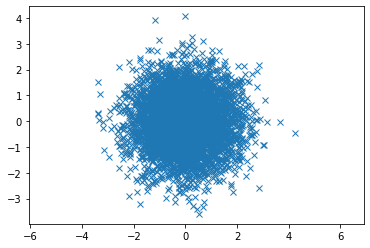

,x,y
0,-0.170866,-1.577759
1,1.736348,0.164840
2,0.442717,0.679636
3,-0.242157,-1.326523
4,-0.104379,-0.732731
...,...,...
4995,-0.685070,-1.220513
4996,0.766488,1.084922
4997,0.286314,-0.068901
4998,1.369330,0.999435


In [80]:
mean = [0, 0]
cov = [[1, 0], [0, 1]]
x, y = np.random.multivariate_normal(mean, cov, 5000).T

plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()
diccionario = list(zip(x,y))

df1 = pd.DataFrame(diccionario, columns = ['x','y'])
df1


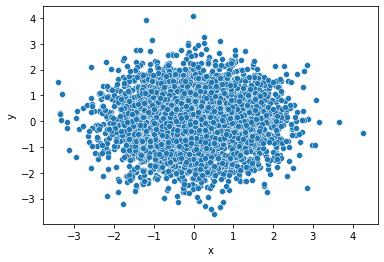

In [81]:
sns.scatterplot(x='x',y='y', data=df1);

<AxesSubplot:>

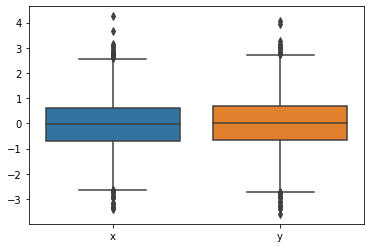

In [82]:
sns.boxplot(data=df1)